In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
%matplotlib notebook

In [2]:
ogdata = pd.read_csv('nbaNew.csv')

In [3]:
ogdata.head(10)

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,8035.0,1986.0,A.C. Green,NaN,PF,22.0,LAL,82.0,1.0,1542.0,...,61.10%,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
1,8420.0,1987.0,A.C. Green,NaN,PF,23.0,LAL,79.0,72.0,2240.0,...,78.00%,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
2,8807.0,1988.0,A.C. Green,NaN,PF,24.0,LAL,82.0,64.0,2636.0,...,77.30%,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
3,9242.0,1989.0,A.C. Green,NaN,PF,25.0,LAL,82.0,82.0,2510.0,...,78.60%,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
4,9688.0,1990.0,A.C. Green,"$1,750,000.00",PF,26.0,LAL,82.0,82.0,2709.0,...,75.10%,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
5,10166.0,1991.0,A.C. Green,"$1,750,000.00",PF,27.0,LAL,82.0,21.0,2164.0,...,73.80%,201.0,315.0,516.0,71.0,59.0,23.0,99.0,117.0,750.0
6,10617.0,1992.0,A.C. Green,"$1,750,000.00",PF,28.0,LAL,82.0,53.0,2902.0,...,74.40%,306.0,456.0,762.0,117.0,91.0,36.0,111.0,141.0,1116.0
7,11060.0,1993.0,A.C. Green,"$1,885,000.00",PF,29.0,LAL,82.0,55.0,2819.0,...,73.90%,287.0,424.0,711.0,116.0,88.0,39.0,116.0,149.0,1051.0
8,11529.0,1994.0,A.C. Green,"$6,472,600.00",PF,30.0,PHO,82.0,55.0,2825.0,...,73.50%,275.0,478.0,753.0,137.0,70.0,38.0,100.0,142.0,1204.0
9,11999.0,1995.0,A.C. Green,"$6,473,000.00",SF,31.0,PHO,82.0,52.0,2687.0,...,73.20%,194.0,475.0,669.0,127.0,55.0,31.0,114.0,146.0,916.0


In [4]:
data2000plus = ogdata[ogdata["SeasonStart"] >= 2000]
realplayers = data2000plus[data2000plus["MP"] >= 2000]

In [5]:
realplayers.head(10)

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
38,19996.0,2010.0,Aaron Brooks,NaN,PG,25.0,HOU,82.0,82.0,2919.0,...,82.20%,54.0,161.0,215.0,434.0,69.0,14.0,232.0,199.0,1604.0
53,24289.0,2017.0,Aaron Gordon,"$5,504,420.00",SF,21.0,ORL,80.0,72.0,2298.0,...,71.90%,116.0,289.0,405.0,150.0,64.0,40.0,89.0,172.0,1019.0
82,15276.0,2001.0,Aaron McKie,"$4,000,000.00",SG,28.0,PHI,76.0,33.0,2394.0,...,76.80%,33.0,278.0,311.0,377.0,106.0,8.0,203.0,178.0,878.0
84,16288.0,2003.0,Aaron McKie,NaN,SF,30.0,PHI,80.0,40.0,2374.0,...,83.60%,61.0,289.0,350.0,278.0,131.0,9.0,109.0,177.0,721.0
85,16826.0,2004.0,Aaron McKie,"$5,500,000.00",SF,31.0,PHI,75.0,41.0,2112.0,...,75.70%,45.0,208.0,253.0,195.0,85.0,23.0,103.0,142.0,689.0
99,15482.0,2001.0,Aaron Williams,"$2,475,000.00",PF,29.0,NJN,82.0,25.0,2336.0,...,78.70%,211.0,379.0,590.0,88.0,59.0,113.0,132.0,319.0,838.0
140,18553.0,2007.0,Adam Morrison,NaN,PF,22.0,CHA,78.0,23.0,2326.0,...,71.00%,54.0,176.0,230.0,163.0,28.0,6.0,130.0,179.0,917.0
275,16183.0,2003.0,Al Harrington,"$5,692,500.00",SF,22.0,IND,82.0,37.0,2467.0,...,77.00%,159.0,352.0,511.0,125.0,71.0,33.0,163.0,280.0,1002.0
276,16709.0,2004.0,Al Harrington,"$6,325,000.00",PF,23.0,IND,79.0,15.0,2441.0,...,73.40%,163.0,345.0,508.0,131.0,80.0,22.0,163.0,250.0,1048.0
277,17294.0,2005.0,Al Harrington,"$6,957,500.00",SF,24.0,ATL,66.0,66.0,2550.0,...,67.20%,145.0,316.0,461.0,208.0,85.0,16.0,204.0,249.0,1158.0


In [6]:
realplayers.keys()

Index(['#', 'SeasonStart', 'PlayerName', 'PlayerSalary ', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS',
       'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
neededData =  {
    "Name": realplayers["PlayerName"],
    "Points": realplayers["PTS"],
    "Assists": realplayers["AST"],
    "OffensiveRebounds": realplayers["ORB"],
    "Position": realplayers["Pos"],
    "Season": realplayers["SeasonStart"]
}

In [8]:
neededDf = pd.DataFrame(neededData)

In [9]:
neededDf.head(10)

,Name,Points,Assists,OffensiveRebounds,Position,Season
38,Aaron Brooks,1604.0,434.0,54.0,PG,2010.0
53,Aaron Gordon,1019.0,150.0,116.0,SF,2017.0
82,Aaron McKie,878.0,377.0,33.0,SG,2001.0
84,Aaron McKie,721.0,278.0,61.0,SF,2003.0
85,Aaron McKie,689.0,195.0,45.0,SF,2004.0
99,Aaron Williams,838.0,88.0,211.0,PF,2001.0
140,Adam Morrison,917.0,163.0,54.0,PF,2007.0
275,Al Harrington,1002.0,125.0,159.0,SF,2003.0
276,Al Harrington,1048.0,131.0,163.0,PF,2004.0
277,Al Harrington,1158.0,208.0,145.0,SF,2005.0


In [10]:
#neededDf.to_csv('cleantData.csv')

In [11]:
df = neededDf

In [12]:
PFdf = neededDf[neededDf["Position"]=="PF"]

In [13]:
PFdf.head(10)

,Name,Points,Assists,OffensiveRebounds,Position,Season
99,Aaron Williams,838.0,88.0,211.0,PF,2001.0
140,Adam Morrison,917.0,163.0,54.0,PF,2007.0
276,Al Harrington,1048.0,131.0,163.0,PF,2004.0
278,Al Harrington,1411.0,238.0,132.0,PF,2006.0
279,Al Harrington,1285.0,149.0,151.0,PF,2007.0
283,Al Harrington,1469.0,102.0,99.0,PF,2009.0
285,Al Harrington,1407.0,92.0,89.0,PF,2009.0
286,Al Harrington,1276.0,110.0,88.0,PF,2010.0
332,Al Thornton,1005.0,98.0,98.0,PF,2008.0
379,Alan Henderson,1083.0,77.0,265.0,PF,2000.0


In [14]:
import sklearn.preprocessing as prepro

In [15]:
def normalize(arr):
    maxv = max(arr)
    minv = min(arr)
    diff = maxv-minv
    for index,num in enumerate(arr):
        arr[index] = (num - minv)/(diff)
    return arr

In [16]:
normalizedp = normalize(np.array(PFdf["Points"]))
normalizedr = normalize(np.array(PFdf["OffensiveRebounds"]))
normalizeda = normalize(np.array(PFdf["Assists"]))

In [17]:
PFdf = PFdf.assign(Points = normalizedp)
PFdf = PFdf.assign(OffensiveRebounds = normalizedr)
PFdf = PFdf.assign(Assists = normalizeda)

In [18]:
PFdf.head(10)


,Name,Points,Assists,OffensiveRebounds,Position,Season
99,Aaron Williams,0.209512,0.114583,0.480337,PF,2001.0
140,Adam Morrison,0.257074,0.244792,0.039326,PF,2007.0
276,Al Harrington,0.335942,0.189236,0.345506,PF,2004.0
278,Al Harrington,0.554485,0.375000,0.258427,PF,2006.0
279,Al Harrington,0.478627,0.220486,0.311798,PF,2007.0
283,Al Harrington,0.589404,0.138889,0.165730,PF,2009.0
285,Al Harrington,0.552077,0.121528,0.137640,PF,2009.0
286,Al Harrington,0.473209,0.152778,0.134831,PF,2010.0
332,Al Thornton,0.310054,0.131944,0.162921,PF,2008.0
379,Alan Henderson,0.357014,0.095486,0.632022,PF,2000.0


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


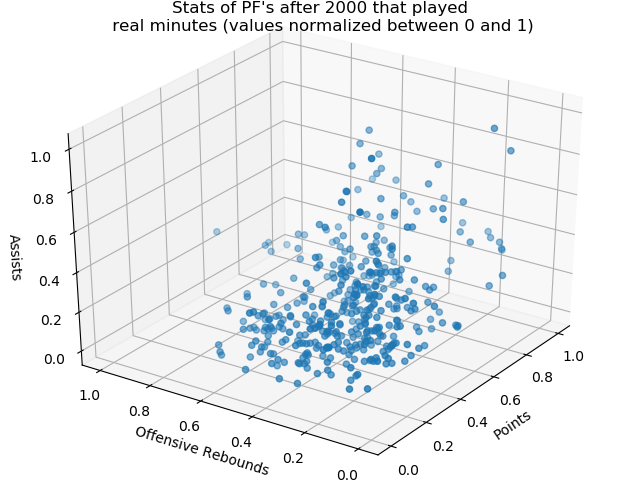

In [20]:
X = [x for x in PFdf["Points"]]
Y = [x for x in PFdf["OffensiveRebounds"]]
Z = [x for x in PFdf["Assists"]]


fig = plt.figure()
ax = Axes3D(fig)



ax.scatter(X, Y, Z)
ax.set_xlabel("Points")
ax.set_ylabel("Offensive Rebounds")
ax.set_zlabel("Assists")
ax.set_title("Stats of PF's after 2000 that played\n real minutes (values normalized between 0 and 1)")
plt.show()